Shape: (4269, 13)
   loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             227

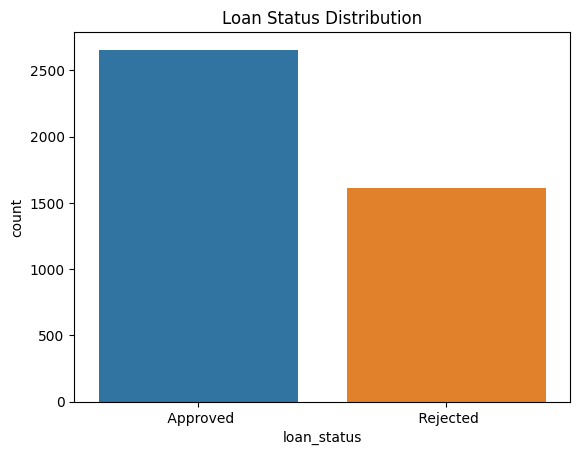


Classification Report:
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       531
    Rejected       0.98      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



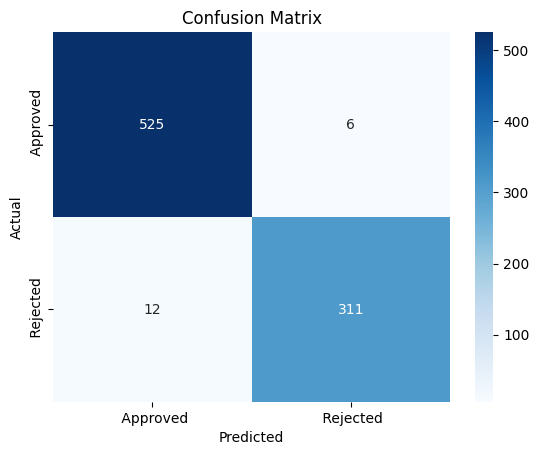

In [5]:
# ======================
# Loan Approval Prediction - Kaggle Ready
# ======================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ======================
# 1) Load Dataset
# ======================
df = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")

# Clean column names (remove spaces)
df.columns = df.columns.str.strip()

print("Shape:", df.shape)
print(df.head())

# ======================
# 2) Check Missing & Target Balance
# ======================
print("\nMissing values:\n", df.isnull().sum())

# Confirm target column name
target_col = 'loan_status'
print("\nTarget distribution:\n", df[target_col].value_counts())

sns.countplot(x=target_col, data=df)
plt.title("Loan Status Distribution")
plt.show()

# ======================
# 3) Features / Target split
# ======================
X = df.drop(columns=[target_col])
y = df[target_col]

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# ======================
# 4) Preprocessing Pipelines
# ======================
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# ======================
# 5) Train/Test Split
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ======================
# 6) Model with Class Weight
# ======================
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(class_weight="balanced", random_state=42))
])

# ======================
# 7) Train Model
# ======================
model.fit(X_train, y_train)

# ======================
# 8) Predictions & Evaluation
# ======================
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.named_steps["classifier"].classes_,
            yticklabels=model.named_steps["classifier"].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
